#Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_excel('/content/drive/MyDrive/RAKAMIN/Project 5.0/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx')
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

#Data Pre-Processing

##Handling Missing Value

In [6]:
df.isna().mean().sort_values(ascending=False) * 100


IkutProgramLOP                        89.895470
AlasanResign                          22.996516
JumlahKetidakhadiran                   2.090592
SkorKepuasanPegawai                    1.742160
JumlahKeikutsertaanProjek              1.045296
JumlahKeterlambatanSebulanTerakhir     0.348432
TanggalPenilaianKaryawan               0.000000
TanggalHiring                          0.000000
TanggalLahir                           0.000000
PernahBekerja                          0.000000
TingkatPendidikan                      0.000000
Email                                  0.000000
NomorHP                                0.000000
Username                               0.000000
EnterpriseID                           0.000000
SkorSurveyEngagement                   0.000000
HiringPlatform                         0.000000
AsalDaerah                             0.000000
PerformancePegawai                     0.000000
JenjangKarir                           0.000000
Pekerjaan                              0

Dapat dilihat diatas terdapat beberapa kolom yang memiliki missing value sehinga bentuk treatment yang akan dilakukan adalah:

-Untuk kolom IkutProgramLOP dapat di drop karena persentase missing value melebihi 40%

-Untuk kolom berikut ini: JumlahKetidakhadiran, SkorKepuasaanPegawai, JumlahKeikutsertaanProjek, row yang berisi missing value akan di drop karena missing value diantara 1%-39%

-Untuk kolom JumlahKeterlambatanSebulanTerakhir akan diisi dengan nilai aggregat karena persentase missing value yang kecil

-Untuk kolom alasan resign akan diisi value 'masih_bekerja' karena merepresentasikan karyawan yang masih bekerja di perusahaan


In [7]:
df.drop(columns=['IkutProgramLOP'],inplace=True)

In [8]:
df.dropna(subset=['JumlahKetidakhadiran', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek'],inplace=True)


In [9]:
df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].mode()[0], inplace = True)

In [10]:
df['AlasanResign'].fillna(value='masih_bekerja', inplace = True)
df['AlasanResign'].value_counts()

masih_bekerja               190
jam_kerja                    16
ganti_karir                  13
kejelasan_karir              11
tidak_bisa_remote            11
toxic_culture                 9
leadership                    9
tidak_bahagia                 7
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: AlasanResign, dtype: int64

In [11]:
#Check Missin Value setelah drop
df.isna().sum().sort_values(ascending=False)

Username                              0
EnterpriseID                          0
TanggalPenilaianKaryawan              0
TanggalHiring                         0
TanggalLahir                          0
AlasanResign                          0
PernahBekerja                         0
TingkatPendidikan                     0
Email                                 0
NomorHP                               0
JumlahKetidakhadiran                  0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKeikutsertaanProjek             0
SkorKepuasanPegawai                   0
SkorSurveyEngagement                  0
HiringPlatform                        0
AsalDaerah                            0
PerformancePegawai                    0
JenjangKarir                          0
Pekerjaan                             0
StatusKepegawaian                     0
JenisKelamin                          0
StatusPernikahan                      0
TanggalResign                         0
dtype: int64

Sudah tidak ada missing value 

##Handling Duplicated Value

In [12]:
df.duplicated().sum()

0

##Finding Unused Value

In [13]:
UniqueValue = []
for col in df.columns:
    UniqueValue.append([col,df[col].unique()])
df_unique = pd.DataFrame(columns=['column', 'unique_value'],
                     data=UniqueValue)
df_unique

,column,unique_value
0,Username,"[spiritedPorpoise3, jealousGelding2, pluckyMue..."
1,EnterpriseID,"[111065, 106080, 106452, 106325, 111171, 10641..."
2,StatusPernikahan,"[Belum_menikah, Menikah, Bercerai, Lainnya, -]"
3,JenisKelamin,"[Pria, Wanita]"
4,StatusKepegawaian,"[Outsource, FullTime, Internship]"
5,Pekerjaan,"[Software Engineer (Back End), Data Analyst, S..."
6,JenjangKarir,"[Freshgraduate_program, Senior_level, Mid_level]"
7,PerformancePegawai,"[Sangat_bagus, Sangat_kurang, Bagus, Biasa, Ku..."
8,AsalDaerah,"[Jakarta Timur, Jakarta Utara, Jakarta Pusat, ..."
9,HiringPlatform,"[Employee_Referral, Website, Indeed, LinkedIn,..."


Dapat dilihat pada tabel diatas bahwa kolom PernahBekerja sebenarnya berisi 1 unique value saja karena disini saya mengasumsikan bahwa nilai '1' pada kolom tersebut sama valuenya dengan nilai 'Yes'. Sehingga dapat langsung kita drop saja kolom tersebut.



In [14]:
df.drop(columns=['PernahBekerja'], inplace=True)


##Adjust Value

In [15]:
df['StatusPernikahan'].unique()

array(['Belum_menikah', 'Menikah', 'Bercerai', 'Lainnya', '-'],
      dtype=object)

Terdapat value '-' yang tidak jelas merefer ke
status pernikahan yang seperti apa. Sehingga
treatment yang perlu dilakukan adalah
mengubah value '-' menjadi 'Lainnya'

In [16]:
df['StatusPernikahan'] = df['StatusPernikahan'].replace(['-'], 'Lainnya')
df['StatusPernikahan'].unique()


array(['Belum_menikah', 'Menikah', 'Bercerai', 'Lainnya'], dtype=object)

##Feature: AlasanResign

In [17]:
df['AlasanResign'].unique()

array(['masih_bekerja', 'toxic_culture', 'jam_kerja', 'ganti_karir',
       'tidak_bahagia', 'internal_conflict', 'Product Design (UI & UX)',
       'kejelasan_karir', 'tidak_bisa_remote', 'apresiasi', 'leadership'],
      dtype=object)

In [18]:
df['AlasanResign'] = df['AlasanResign'].replace(['Product Design (UI & UX)'], 'tidak_disebutkan')
df['AlasanResign'].unique()

array(['masih_bekerja', 'toxic_culture', 'jam_kerja', 'ganti_karir',
       'tidak_bahagia', 'internal_conflict', 'tidak_disebutkan',
       'kejelasan_karir', 'tidak_bisa_remote', 'apresiasi', 'leadership'],
      dtype=object)

Terdapat value 'Product Design (UI & UX)' yang seharusnya merupakan value dari kolom 'Pekerjaan'. Hal ini mungkin merupakan kesalahan input sehingga lebih baik value diganti dengan value 'tidak_disebutkan' . Sehingga treatment yang perlu dilakukan adalah mengubah value 'Product Design (UI & UX)' menjadi 'tidak_disebutkan' saja.

In [19]:
df.isna().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
dtype: int64

##Adjust Data Types

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            276 non-null    object 
 1   EnterpriseID                        276 non-null    int64  
 2   StatusPernikahan                    276 non-null    object 
 3   JenisKelamin                        276 non-null    object 
 4   StatusKepegawaian                   276 non-null    object 
 5   Pekerjaan                           276 non-null    object 
 6   JenjangKarir                        276 non-null    object 
 7   PerformancePegawai                  276 non-null    object 
 8   AsalDaerah                          276 non-null    object 
 9   HiringPlatform                      276 non-null    object 
 10  SkorSurveyEngagement                276 non-null    int64  
 11  SkorKepuasanPegawai                 276 non-n

Terlihat bahwa kolom yang berbau tanggal masih bertipe object. Sehingga treatment yang perlu dilakukan adalah mengubah tipe data tersebut menjadi datetime.

In [21]:
df['TanggalLahir']=pd.to_datetime(df['TanggalLahir'])
df['TanggalHiring']=pd.to_datetime(df['TanggalHiring'])
df['TanggalPenilaianKaryawan']=pd.to_datetime(df['TanggalPenilaianKaryawan'])
df['TanggalResign']=pd.to_datetime(df['TanggalResign'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            276 non-null    object        
 1   EnterpriseID                        276 non-null    int64         
 2   StatusPernikahan                    276 non-null    object        
 3   JenisKelamin                        276 non-null    object        
 4   StatusKepegawaian                   276 non-null    object        
 5   Pekerjaan                           276 non-null    object        
 6   JenjangKarir                        276 non-null    object        
 7   PerformancePegawai                  276 non-null    object        
 8   AsalDaerah                          276 non-null    object        
 9   HiringPlatform                      276 non-null    object        
 10  SkorSurveyEngagement      

#TASK 2

In [22]:
df_coba=df.copy()
df_coba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            276 non-null    object        
 1   EnterpriseID                        276 non-null    int64         
 2   StatusPernikahan                    276 non-null    object        
 3   JenisKelamin                        276 non-null    object        
 4   StatusKepegawaian                   276 non-null    object        
 5   Pekerjaan                           276 non-null    object        
 6   JenjangKarir                        276 non-null    object        
 7   PerformancePegawai                  276 non-null    object        
 8   AsalDaerah                          276 non-null    object        
 9   HiringPlatform                      276 non-null    object        
 10  SkorSurveyEngagement      

In [23]:
df_coba['TahunHiring']=pd.DatetimeIndex(df_coba['TanggalHiring']).year
df_coba['TahunResign']=pd.DatetimeIndex(df_coba['TanggalResign']).year

In [24]:
df_hir=df_coba.groupby(['TahunHiring']).agg({ 'EnterpriseID' : ['count']}).reset_index()
df_hir.columns=['TahunHiring','JumlahKaryawanMasuk']
df_hir

,TahunHiring,JumlahKaryawanMasuk
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,74
6,2012,38
7,2013,43
8,2014,56
9,2015,26


In [25]:
df_res=df_coba.groupby(['TahunResign']).agg({ 'EnterpriseID' : ['count']}).reset_index()
df_res.columns=['TahunResign','JumlahKaryawanKeluar']
df_res

,TahunResign,JumlahKaryawanKeluar
0,2013.0,5
1,2014.0,12
2,2015.0,8
3,2016.0,8
4,2017.0,19
5,2018.0,24
6,2019.0,4
7,2020.0,6


In [26]:
df_task2=df_hir.merge(df_res,
               left_on='TahunHiring',
               right_on='TahunResign',
               how='outer')
df_task2

,TahunHiring,JumlahKaryawanMasuk,TahunResign,JumlahKaryawanKeluar
0,2006.0,1.0,NaN,NaN
1,2007.0,2.0,NaN,NaN
2,2008.0,2.0,NaN,NaN
3,2009.0,7.0,NaN,NaN
4,2010.0,8.0,NaN,NaN
5,2011.0,74.0,NaN,NaN
6,2012.0,38.0,NaN,NaN
7,2013.0,43.0,2013.0,5.0
8,2014.0,56.0,2014.0,12.0
9,2015.0,26.0,2015.0,8.0


In [27]:
df_task2['JumlahKaryawanMasuk'] = df_task2['JumlahKaryawanMasuk'].fillna(0)
df_task2['JumlahKaryawanKeluar'] = df_task2['JumlahKaryawanKeluar'].fillna(0)

In [28]:
df_task2['TahunHiring'] = df_task2['TahunHiring'].fillna('-')
df_task2['TahunResign'] = df_task2['TahunResign'].fillna('-')

In [29]:
df_task2.head()

,TahunHiring,JumlahKaryawanMasuk,TahunResign,JumlahKaryawanKeluar
0,2006.0,1.0,-,0.0
1,2007.0,2.0,-,0.0
2,2008.0,2.0,-,0.0
3,2009.0,7.0,-,0.0
4,2010.0,8.0,-,0.0


In [30]:
df_task2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TahunHiring           15 non-null     object 
 1   JumlahKaryawanMasuk   15 non-null     float64
 2   TahunResign           15 non-null     object 
 3   JumlahKaryawanKeluar  15 non-null     float64
dtypes: float64(2), object(2)
memory usage: 600.0+ bytes


In [31]:
tahun = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
df_task2['Tahun'] = tahun
cols = df_task2.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_task2 = df_task2[cols]
df_task2.drop(columns=['TahunHiring','TahunResign'])


,Tahun,JumlahKaryawanMasuk,JumlahKaryawanKeluar
0,2006,1.0,0.0
1,2007,2.0,0.0
2,2008,2.0,0.0
3,2009,7.0,0.0
4,2010,8.0,0.0
5,2011,74.0,0.0
6,2012,38.0,0.0
7,2013,43.0,5.0
8,2014,56.0,12.0
9,2015,26.0,8.0


In [32]:
df_task2 = df_task2[['Tahun', 'JumlahKaryawanMasuk', 'JumlahKaryawanKeluar']]
df_task2

,Tahun,JumlahKaryawanMasuk,JumlahKaryawanKeluar
0,2006,1.0,0.0
1,2007,2.0,0.0
2,2008,2.0,0.0
3,2009,7.0,0.0
4,2010,8.0,0.0
5,2011,74.0,0.0
6,2012,38.0,0.0
7,2013,43.0,5.0
8,2014,56.0,12.0
9,2015,26.0,8.0


In [33]:
df_task2['TotalKaryawanMasuk'] = df_task2['JumlahKaryawanMasuk'].cumsum()
df_task2['TotalKaryawanKeluar'] = df_task2['JumlahKaryawanKeluar'].cumsum()
df_task2['TotalKaryawanperTahun'] = df_task2['TotalKaryawanMasuk'] - df_task2['TotalKaryawanKeluar']
df_task2

,Tahun,JumlahKaryawanMasuk,JumlahKaryawanKeluar,TotalKaryawanMasuk,TotalKaryawanKeluar,TotalKaryawanperTahun
0,2006,1.0,0.0,1.0,0.0,1.0
1,2007,2.0,0.0,3.0,0.0,3.0
2,2008,2.0,0.0,5.0,0.0,5.0
3,2009,7.0,0.0,12.0,0.0,12.0
4,2010,8.0,0.0,20.0,0.0,20.0
5,2011,74.0,0.0,94.0,0.0,94.0
6,2012,38.0,0.0,132.0,0.0,132.0
7,2013,43.0,5.0,175.0,5.0,170.0
8,2014,56.0,12.0,231.0,17.0,214.0
9,2015,26.0,8.0,257.0,25.0,232.0


In [35]:
df_viz2=df_task2.copy()
df_viz2.head()

,Tahun,JumlahKaryawanMasuk,JumlahKaryawanKeluar,TotalKaryawanMasuk,TotalKaryawanKeluar,TotalKaryawanperTahun
0,2006,1.0,0.0,1.0,0.0,1.0
1,2007,2.0,0.0,3.0,0.0,3.0
2,2008,2.0,0.0,5.0,0.0,5.0
3,2009,7.0,0.0,12.0,0.0,12.0
4,2010,8.0,0.0,20.0,0.0,20.0


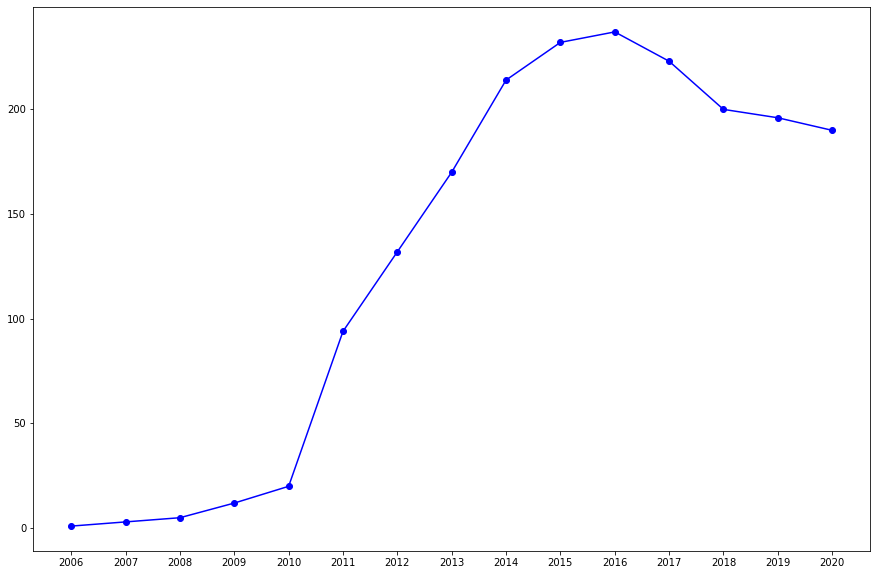

In [39]:
x = df_viz2['Tahun']
y = df_viz2['TotalKaryawanperTahun']

plt.figure(figsize=(15, 10))
plt.plot(x, y, color='Blue', marker='o')
plt.xticks(x)
plt.show()

#TASK 3

In [40]:
df_coba2=df.copy()
df_coba2['TanggalResign']=df_coba2['TanggalResign'].astype(str)

In [41]:
df_working=df_coba2[~df_coba2['TanggalResign'].str.contains('-')]#karena kalau ada - berarti ada tanggal resignnya yang berarti sudah resign
df_working=df_working.groupby(['Pekerjaan']).count().reset_index()
dfw=df_working[['Pekerjaan','Username']]
dfw.columns=['Pekerjaan','JumlahKaryawanAktif']
dfw

,Pekerjaan,JumlahKaryawanAktif
0,Data Analyst,7
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),14
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,2
9,Software Architect,1


In [42]:
df_resign=df_coba2[df_coba2['TanggalResign'].str.contains('-')]#Karena kalau tidak ada ~ berarti karyawan masih bekerja
df_resign=df_resign.groupby(['Pekerjaan']).count().reset_index()
dfr=df_resign[['Pekerjaan','Username']]
dfr.columns=['Pekerjaan','JumlahKaryawanResign']
dfr

,Pekerjaan,JumlahKaryawanResign
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),8
3,Product Manager,5
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),27


In [43]:
df_task3=dfw.merge(dfr,
               left_on='Pekerjaan',
               right_on='Pekerjaan',
               how='outer')
df_task3

,Pekerjaan,JumlahKaryawanAktif,JumlahKaryawanResign
0,Data Analyst,7,8.0
1,Data Engineer,7,3.0
2,DevOps Engineer,3,NaN
3,Digital Product Manager,2,NaN
4,Machine Learning Engineer,2,NaN
5,Product Design (UI & UX),14,8.0
6,Product Design (UX Researcher),1,NaN
7,Product Manager,11,5.0
8,Scrum Master,2,NaN
9,Software Architect,1,NaN


In [45]:
df_task3['JumlahKaryawanResign'] = df_task3['JumlahKaryawanResign'].fillna(0)
df_task3['TotalKaryawan']=df_task3['JumlahKaryawanAktif']+df_task3['JumlahKaryawanResign']
df_task3['PersentaseKaryawanAktif']=df_task3['JumlahKaryawanAktif']/df_task3['TotalKaryawan']

In [46]:
df_task3

,Pekerjaan,JumlahKaryawanAktif,JumlahKaryawanResign,TotalKaryawan,PersentaseKaryawanAktif
0,Data Analyst,7,8.0,15.0,0.466667
1,Data Engineer,7,3.0,10.0,0.700000
2,DevOps Engineer,3,0.0,3.0,1.000000
3,Digital Product Manager,2,0.0,2.0,1.000000
4,Machine Learning Engineer,2,0.0,2.0,1.000000
5,Product Design (UI & UX),14,8.0,22.0,0.636364
6,Product Design (UX Researcher),1,0.0,1.0,1.000000
7,Product Manager,11,5.0,16.0,0.687500
8,Scrum Master,2,0.0,2.0,1.000000
9,Software Architect,1,0.0,1.0,1.000000


In [47]:
df_viz3=df_task3.drop(columns=['TotalKaryawan','PersentaseKaryawanAktif'])
df_viz3.columns=['Pekerjaan','ActiveWorker','Resigned']

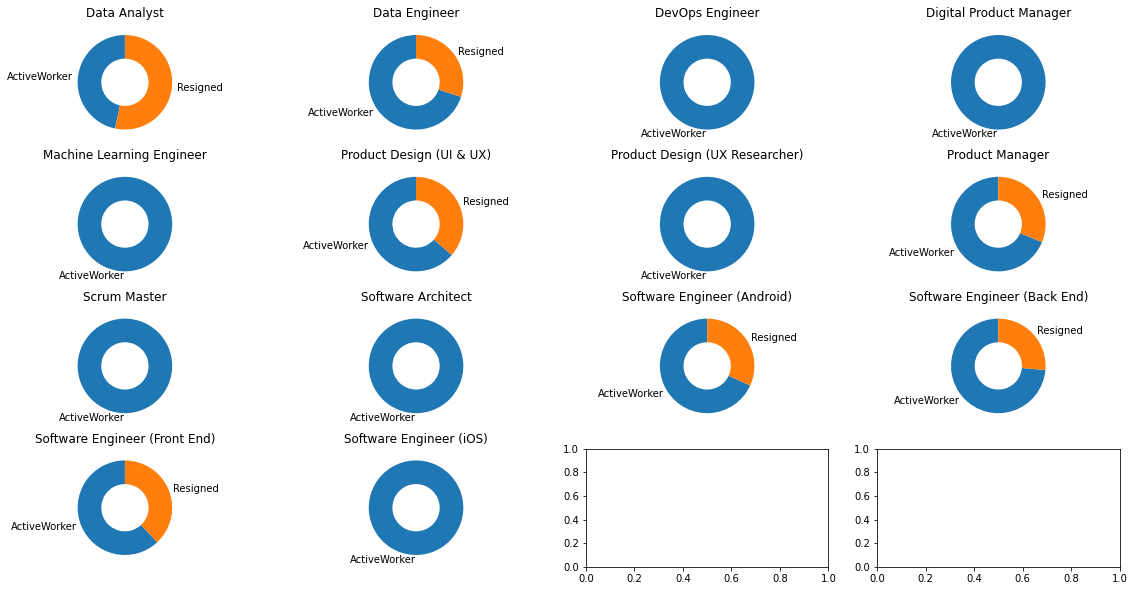

In [48]:
fig, axes = plt.subplots(4, 4, figsize=(20, 10))

for i, (idx, row) in enumerate(df_viz3.set_index('Pekerjaan').iterrows()):
    ax = axes[i // 4, i % 4]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, wedgeprops=dict(width=.5), startangle=90)
    ax.set_title(idx)

fig.subplots_adjust(wspace=.2)

#task 4

##Data Pre-Processing II

In [49]:
df_new=df.copy()
df_new.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                         190
dtype: int64

Disini masih ada nilai nan/null pada TanggalResign karena value yang awalnya '-' akan diganti menjadi nan yang disebabkan oleh pd.to_datetime(df['TanggalResign'],errors='coerce'). Namun pada model nantinya juga kita tidak memerlukan feature yang berhubungan dengan tanggal maka semua feature tanggal akan di drop.

In [50]:
df_new.drop(columns=['TanggalLahir','TanggalHiring','TanggalPenilaianKaryawan','TanggalResign'],inplace=True)

In [51]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 286
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            276 non-null    object 
 1   EnterpriseID                        276 non-null    int64  
 2   StatusPernikahan                    276 non-null    object 
 3   JenisKelamin                        276 non-null    object 
 4   StatusKepegawaian                   276 non-null    object 
 5   Pekerjaan                           276 non-null    object 
 6   JenjangKarir                        276 non-null    object 
 7   PerformancePegawai                  276 non-null    object 
 8   AsalDaerah                          276 non-null    object 
 9   HiringPlatform                      276 non-null    object 
 10  SkorSurveyEngagement                276 non-null    int64  
 11  SkorKepuasanPegawai                 276 non-n

Menghapus beberapa feature lainnya yang tidak begitu berpengaruh kedalam model seperti: Username, EnterpriseID,NomorHP, dan Email

In [52]:
df_new.drop(columns=['Username','EnterpriseID','NomorHP','Email'],inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 286
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    276 non-null    object 
 1   JenisKelamin                        276 non-null    object 
 2   StatusKepegawaian                   276 non-null    object 
 3   Pekerjaan                           276 non-null    object 
 4   JenjangKarir                        276 non-null    object 
 5   PerformancePegawai                  276 non-null    object 
 6   AsalDaerah                          276 non-null    object 
 7   HiringPlatform                      276 non-null    object 
 8   SkorSurveyEngagement                276 non-null    int64  
 9   SkorKepuasanPegawai                 276 non-null    float64
 10  JumlahKeikutsertaanProjek           276 non-null    float64
 11  JumlahKeterlambatanSebulanTerakhir  276 non-n

#Human-Centered AI Implementation

Untuk menjadikan model agar tetap memikirkan/mempertimbangkan beberapa faktor kemanusiaan maka beberapa feature perlu dihapus dengan alasan agar tidak ada diskriminasi pada model. Feature feature yang perlu dihapus meliputi:

1. JenisKelamin & StatusPernikahan

2. TingkatPendidikan

3. AsalDaerah


In [53]:
df_new.drop(columns=['JenisKelamin','StatusPernikahan','TingkatPendidikan','AsalDaerah'],inplace=True)

In [54]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusKepegawaian                   276 non-null    object 
 1   Pekerjaan                           276 non-null    object 
 2   JenjangKarir                        276 non-null    object 
 3   PerformancePegawai                  276 non-null    object 
 4   HiringPlatform                      276 non-null    object 
 5   SkorSurveyEngagement                276 non-null    int64  
 6   SkorKepuasanPegawai                 276 non-null    float64
 7   JumlahKeikutsertaanProjek           276 non-null    float64
 8   JumlahKeterlambatanSebulanTerakhir  276 non-null    float64
 9   JumlahKetidakhadiran                276 non-null    float64
 10  AlasanResign                        276 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usa

##Handling Outliers

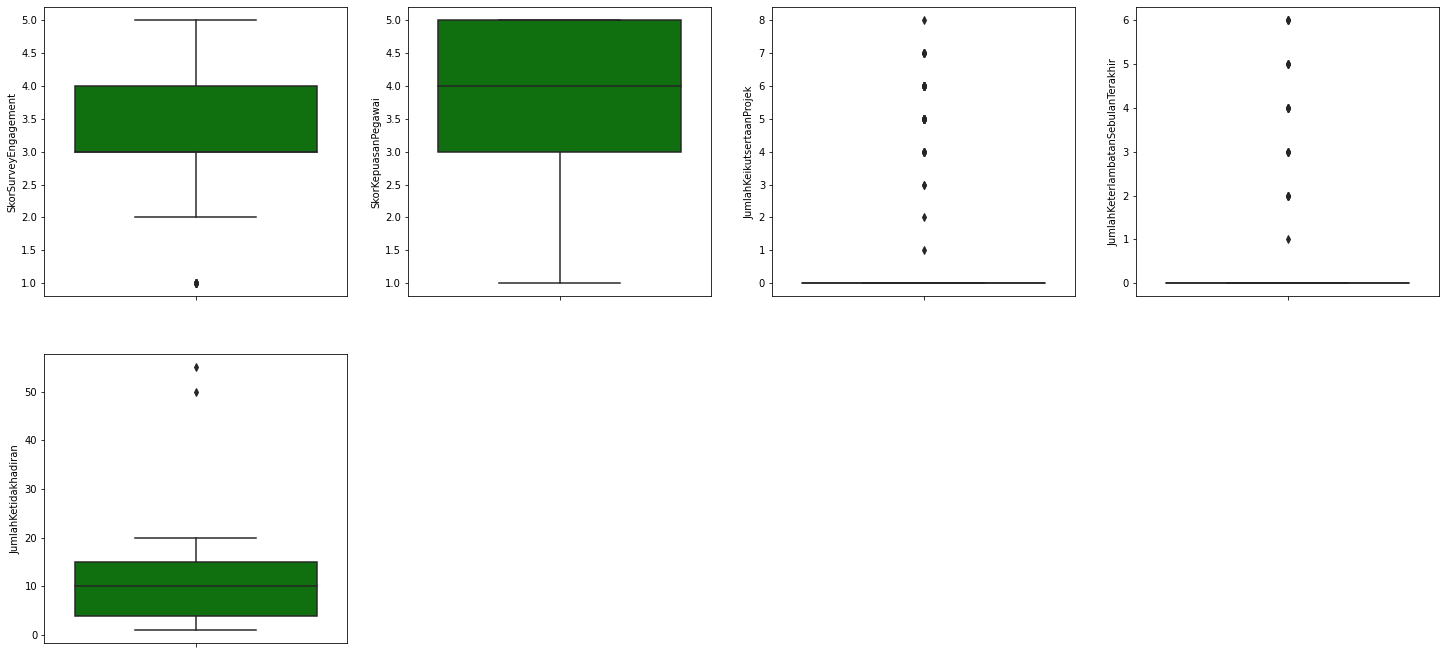

In [56]:
numerical = [column for column in df_new.columns if (df_new[column].dtype=='int64')|(df_new[column].dtype=='float64')]

features = numerical
plt.figure(figsize=(25, 50))
for i in range(0, len(features)):
        plt.subplot(8, 4, i+1)
        sns.boxplot(y=df_new[features[i]], color='Green', orient='v')


Masih terdapat outlier pada dataset sehingga dilakukan treatment dengan metode IQR

In [57]:
col_num=list(numerical)
df_clean=df_new.copy()

In [58]:
def det_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')
    
    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    return limit_bawah, limit_atas

for col in col_num:
    limit_bawah, limit_atas = det_outliers(df_new[col])
    df_clean = df_clean[(df_clean[col]>= limit_bawah) & (df_clean[col]<= limit_atas)]

IQR: 1.0
IQR: 2.0
IQR: 0.0
IQR: 0.0
IQR: 11.0


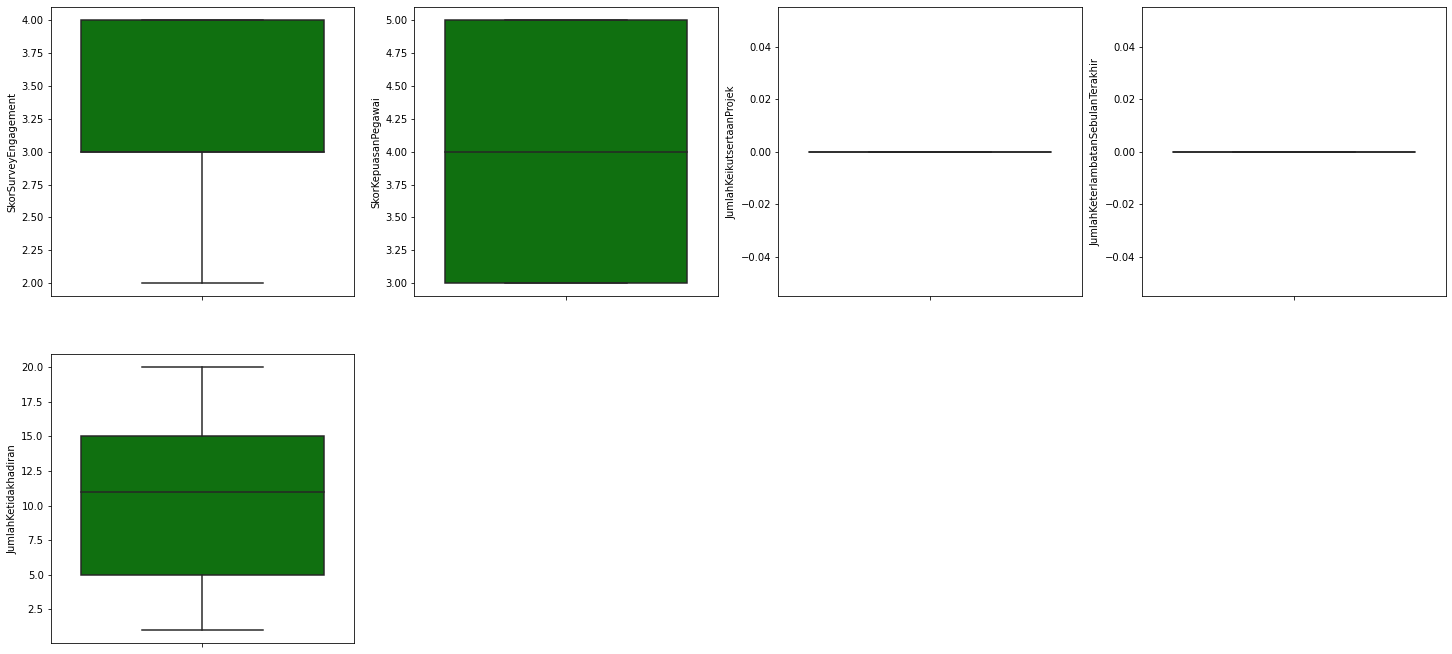

In [59]:
numerical = [column for column in df_clean.columns if (df_clean[column].dtype=='int64')|(df_clean[column].dtype=='float64')]

features = numerical
plt.figure(figsize=(25, 50))
for i in range(0, len(features)):
        plt.subplot(8, 4, i+1)
        sns.boxplot(y=df_clean[features[i]], color='Green', orient='v')


#Feature Encoding

In [60]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusKepegawaian                   187 non-null    object 
 1   Pekerjaan                           187 non-null    object 
 2   JenjangKarir                        187 non-null    object 
 3   PerformancePegawai                  187 non-null    object 
 4   HiringPlatform                      187 non-null    object 
 5   SkorSurveyEngagement                187 non-null    int64  
 6   SkorKepuasanPegawai                 187 non-null    float64
 7   JumlahKeikutsertaanProjek           187 non-null    float64
 8   JumlahKeterlambatanSebulanTerakhir  187 non-null    float64
 9   JumlahKetidakhadiran                187 non-null    float64
 10  AlasanResign                        187 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usa

In [61]:
pegawai=pd.get_dummies(df_clean['StatusKepegawaian'], prefix='status_kepegawaian')
df_clean=pd.concat([df_clean,pegawai], axis=1)

kerja=pd.get_dummies(df_clean['Pekerjaan'], prefix='pekerjaan')
df_clean=pd.concat([df_clean,kerja], axis=1)

karir=pd.get_dummies(df_clean['JenjangKarir'], prefix='jenjang_karir')
df_clean=pd.concat([df_clean,karir], axis=1)

platform=pd.get_dummies(df_clean['HiringPlatform'], prefix='platform')
df_clean=pd.concat([df_clean,platform], axis=1)

alasan=pd.get_dummies(df_clean['AlasanResign'], prefix='alasan')
df_clean=pd.concat([df_clean,alasan], axis=1)

Untuk feature PerformancePegawai dapat dilakukan label encoding

In [62]:
mapping_performance={
    'Sangat_kurang':0,
    'Kurang':1,
    'Biasa':2,
    'Bagus':3,
    'Sangat_bagus':4,    
}
df_clean['PerformancePegawai']=df_clean['PerformancePegawai'].map(mapping_performance)


In [63]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 286
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   StatusKepegawaian                         187 non-null    object 
 1   Pekerjaan                                 187 non-null    object 
 2   JenjangKarir                              187 non-null    object 
 3   PerformancePegawai                        187 non-null    int64  
 4   HiringPlatform                            187 non-null    object 
 5   SkorSurveyEngagement                      187 non-null    int64  
 6   SkorKepuasanPegawai                       187 non-null    float64
 7   JumlahKeikutsertaanProjek                 187 non-null    float64
 8   JumlahKeterlambatanSebulanTerakhir        187 non-null    float64
 9   JumlahKetidakhadiran                      187 non-null    float64
 10  AlasanResign                          

In [64]:
df_clean.drop(columns=['JenjangKarir','StatusKepegawaian','Pekerjaan','HiringPlatform','AlasanResign'],inplace=True)

In [65]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 286
Data columns (total 44 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   PerformancePegawai                        187 non-null    int64  
 1   SkorSurveyEngagement                      187 non-null    int64  
 2   SkorKepuasanPegawai                       187 non-null    float64
 3   JumlahKeikutsertaanProjek                 187 non-null    float64
 4   JumlahKeterlambatanSebulanTerakhir        187 non-null    float64
 5   JumlahKetidakhadiran                      187 non-null    float64
 6   status_kepegawaian_FullTime               187 non-null    uint8  
 7   status_kepegawaian_Internship             187 non-null    uint8  
 8   status_kepegawaian_Outsource              187 non-null    uint8  
 9   pekerjaan_Data Analyst                    187 non-null    uint8  
 10  pekerjaan_Data Engineer               

Target = alasan_masih_bekerja

#Modeling & Evaluation

In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV


In [67]:
#Standarisasi/normalisasi kolom
for col in df_clean.columns:
        df_clean[col] = MinMaxScaler().fit_transform(df_clean[col].values.reshape(len(df_clean), 1))


In [68]:
def eval_classification(model, xtrain, ytrain, xtest, ytest):
    pred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print(key+':', model.get_params()[key])
        
def show_cmatrix(ytest, pred):
    # Creating confusion matrix 
    cm = confusion_matrix(ytest, pred)

    # Putting the matrix a dataframe form  
    cm_df = pd.DataFrame(cm, index=['Actually Resign', 'Actually not Resign'],
                 columns=['Predicted Resign', 'Predicted not Resign'])
    
    # visualizing the confusion matrix
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10,4))
        
    sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu",xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 20})
    plt.title("Confusion Matrix", size=20)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class');

In [69]:
# Split Feature and Label

x = df_clean.drop(columns=['alasan_masih_bekerja'], axis=1)
y = df_clean['alasan_masih_bekerja'] # target / label
print(x.shape)
print(y.shape)

(187, 43)
(187,)


In [70]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

##Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

In [72]:
eval_classification(lr_model, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.86
Recall (Test Set): 1.00
F1-Score (Test Set): 0.92
AUC: 0.95


In [73]:
print('Train score: ' + str(lr_model.score(x_train, y_train))) 
print('Test score:' + str(lr_model.score(x_test, y_test))) 

Train score: 0.9615384615384616
Test score:0.8947368421052632


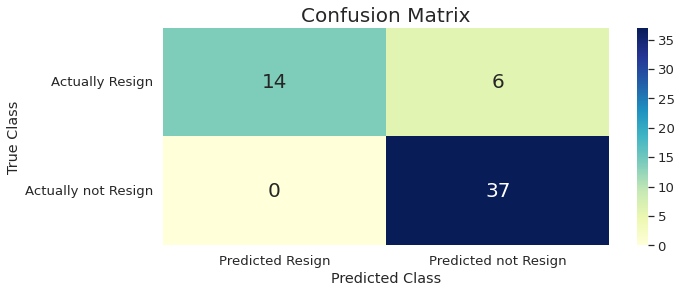

In [74]:
show_cmatrix(y_test, y_pred_lr)

In [75]:
recall_lr = recall_score(y_test, y_pred_lr)
acc_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
acc_lr_train = lr_model.score(x_train, y_train)

##KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

In [77]:
eval_classification(knn_model, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.65
Recall (Test Set): 1.00
F1-Score (Test Set): 0.79
AUC: 0.80


In [78]:
print('Train score: ' + str(knn_model.score(x_train, y_train))) 
print('Test score:' + str(knn_model.score(x_test, y_test))) 

Train score: 0.7230769230769231
Test score:0.6491228070175439


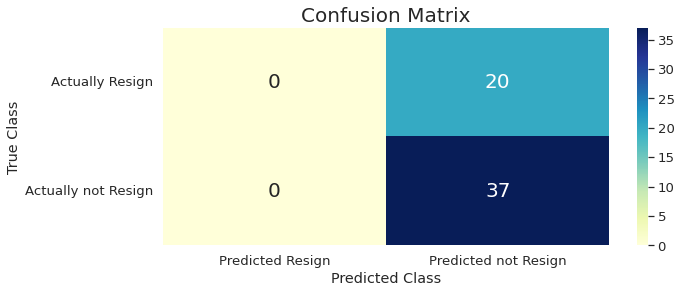

In [79]:
show_cmatrix(y_test, y_pred_knn)

In [80]:
recall_knn = recall_score(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
acc_knn_train = knn_model.score(x_train, y_train)


##Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred_dt = dt_model.predict(x_test)

In [82]:
eval_classification(dt_model, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC: 1.00


In [83]:
print('Train score: ' + str(dt_model.score(x_train, y_train))) 
print('Test score:' + str(dt_model.score(x_test, y_test)))

Train score: 1.0
Test score:1.0


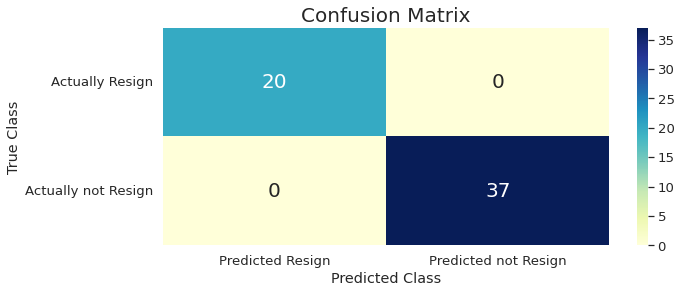

In [84]:
show_cmatrix(y_test, y_pred_dt)

In [85]:
recall_dt = recall_score(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
acc_dt_train = dt_model.score(x_train, y_train)

#Evaluation

In [86]:
evaluation_summary = {
    'Log Res':[acc_lr, recall_lr, precision_lr, f1_lr],
    'KNN':[acc_knn, recall_knn, precision_knn, f1_knn],
    'Decision Tree':[acc_dt, recall_dt, precision_dt, f1_dt]
}

eva_sum = pd.DataFrame(data = evaluation_summary, index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
eva_sum

,Log Res,KNN,Decision Tree
Accuracy,0.894737,0.649123,1.0
Recall,1.000000,1.000000,1.0
Precision,0.860465,0.649123,1.0
F1 Score,0.925000,0.787234,1.0


In [87]:
evaluation_summary_train_test = {
    "Train" : [acc_lr_train, acc_knn_train, acc_dt_train],
    "Test": [acc_lr, acc_knn, acc_dt]
}

eva_sum_train_test = pd.DataFrame(data = evaluation_summary_train_test, index = ['Log Res','KNN', 'Decision Tree'])
eva_sum_train_test

,Train,Test
Log Res,0.961538,0.894737
KNN,0.723077,0.649123
Decision Tree,1.000000,1.000000


#Model + Evaluation with Hyperparameter Tuning

##LogReg Tuning

In [88]:
hyperparameters = { 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                   'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
                   'C' : [100, 10, 1.0, 0.1, 0.01] }

lr_tuned = LogisticRegression()

lr_tuned_model = RandomizedSearchCV(lr_tuned, hyperparameters, cv=5, scoring='recall')
lr_tuned_model.fit(x_train, y_train)
y_pred_lr_tuned = lr_tuned_model.predict(x_test)

In [89]:
show_best_hyperparameter(lr_tuned_model.best_estimator_, hyperparameters)

solver: liblinear
penalty: l2
C: 0.01


In [90]:
eval_classification(lr_tuned_model, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.65
Recall (Test Set): 1.00
F1-Score (Test Set): 0.79
AUC: 0.65


In [91]:
print('Train score: ' + str(lr_tuned_model.score(x_train, y_train))) 
print('Test score:' + str(lr_tuned_model.score(x_test, y_test)))

Train score: 1.0
Test score:1.0


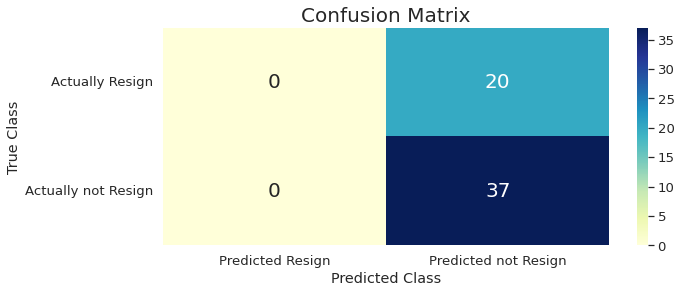

In [92]:
show_cmatrix(y_test, y_pred_lr_tuned)

In [93]:
recall_lr_tuned = recall_score(y_test, y_pred_lr_tuned)
acc_lr_tuned = accuracy_score(y_test, y_pred_lr_tuned)
precision_lr_tuned = precision_score(y_test, y_pred_lr_tuned)
f1_lr_tuned = f1_score(y_test, y_pred_lr_tuned)
acc_lr_tuned_train = lr_tuned_model.score(x_train, y_train)


##KNN Tuning

In [94]:
hyperparameters = {'n_neighbors' : [5,7,9,11,13,15],
                   'weights' : ['uniform','distance'],
                   'metric' : ['minkowski','euclidean','manhattan']
                  }

knn_tuned = KNeighborsClassifier()

knn_tuned_model = RandomizedSearchCV(knn_tuned, hyperparameters, cv=5, scoring='recall')
knn_tuned_model.fit(x_train, y_train)
y_pred_knn_tuned = knn_tuned_model.predict(x_test)


In [95]:
show_best_hyperparameter(knn_tuned_model.best_estimator_, hyperparameters)


n_neighbors: 11
weights: uniform
metric: manhattan


In [96]:
eval_classification(knn_tuned_model, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.67
Precision (Test Set): 0.66
Recall (Test Set): 1.00
F1-Score (Test Set): 0.80
AUC: 0.75


In [97]:
print('Train score: ' + str(knn_tuned_model.score(x_train, y_train))) 
print('Test score:' + str(knn_tuned_model.score(x_test, y_test))) 

Train score: 1.0
Test score:1.0


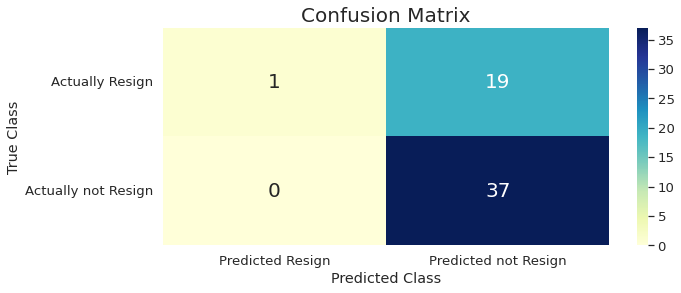

In [98]:
show_cmatrix(y_test, y_pred_knn_tuned)

In [99]:
recall_knn_tuned = recall_score(y_test, y_pred_knn_tuned)
acc_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
precision_knn_tuned = precision_score(y_test, y_pred_knn_tuned)
f1_knn_tuned = f1_score(y_test, y_pred_knn_tuned)
acc_knn_tuned_train = knn_tuned_model.score(x_train, y_train)


##DT Tuning

In [100]:
hyperparameters = {'max_depth': [2, 3, 5, 10, 20],
                   'min_samples_leaf': [5, 10, 20, 50, 100],
                   'criterion': ["gini", "entropy"]}

dt_tuned = DecisionTreeClassifier()

dt_tuned_model = RandomizedSearchCV(dt_tuned, hyperparameters, cv=5, scoring='recall')
dt_tuned_model.fit(x_train, y_train)
y_pred_dt_tuned = dt_tuned_model.predict(x_test)


In [101]:
show_best_hyperparameter(dt_tuned_model.best_estimator_, hyperparameters)

max_depth: 20
min_samples_leaf: 50
criterion: gini


In [102]:
eval_classification(dt_tuned_model, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.65
Recall (Test Set): 1.00
F1-Score (Test Set): 0.79
AUC: 0.50


In [103]:
print('Train score: ' + str(dt_tuned_model.score(x_train, y_train))) 
print('Test score:' + str(dt_tuned_model.score(x_test, y_test))) 

Train score: 1.0
Test score:1.0


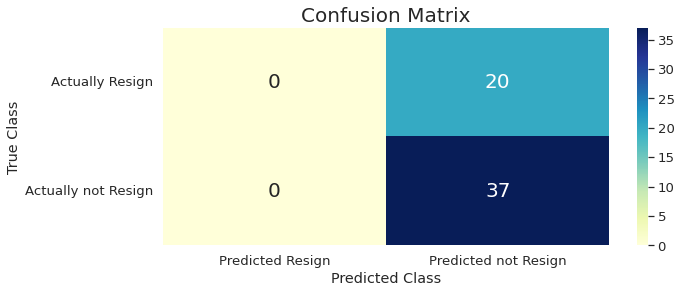

In [104]:
show_cmatrix(y_test, y_pred_dt_tuned)


In [105]:
recall_dt_tuned = recall_score(y_test, y_pred_dt_tuned)
acc_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
precision_dt_tuned = precision_score(y_test, y_pred_dt_tuned)
f1_dt_tuned = f1_score(y_test, y_pred_dt_tuned)
acc_dt_tuned_train = dt_tuned_model.score(x_train, y_train)

#Evaluation with Hyperparameter Tuning

In [106]:
evaluation_tuned = {
    'Logistic Regression Tuned': [acc_lr_tuned, recall_lr_tuned, precision_lr_tuned, f1_lr_tuned],
    'KNN Tuned':[acc_knn_tuned, recall_knn_tuned, precision_knn_tuned, f1_knn_tuned],
    'Decision Tree Tuned':[acc_dt_tuned, recall_dt_tuned, precision_dt_tuned, f1_dt_tuned],
   } 

eva_tuned = pd.DataFrame(data = evaluation_tuned, index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
eva_tuned


,Logistic Regression Tuned,KNN Tuned,Decision Tree Tuned
Accuracy,0.649123,0.666667,0.649123
Recall,1.000000,1.000000,1.000000
Precision,0.649123,0.660714,0.649123
F1 Score,0.787234,0.795699,0.787234


In [107]:
evaluation_summary_train_test_tuned = {
    "Train" : [acc_lr_tuned_train, acc_knn_tuned_train, acc_dt_tuned_train],
    "Test": [acc_lr_tuned, acc_knn_tuned, acc_dt_tuned]
}

eva_sum_train_test_tuned = pd.DataFrame(data = evaluation_summary_train_test_tuned, index = ['Log Res','KNN', 'Decision Tree'])
eva_sum_train_test_tuned

,Train,Test
Log Res,1.0,0.649123
KNN,1.0,0.666667
Decision Tree,1.0,0.649123
